In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk

sns.set_style('darkgrid')
plt.style.use("cyberpunk")

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [2]:
display(train_df.head())
display(test_df.head())

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


In [3]:
print(train_df.shape)
print(test_df.shape)
train_df.info()

(900000, 33)
(700000, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-nul

In [4]:
def val_count_df(df, column_name, sort=True):
    value_count = df[column_name].value_counts(sort=sort).reset_index().rename(columns={column_name:"Value Count","index":column_name}).set_index(column_name)
    value_count["Percentage"] = df[column_name].value_counts(sort=sort,normalize=True)*100
    value_count = value_count.reset_index()
    return value_count

,target,Value Count,Percentage
0,0,462161,51.351222
1,1,437839,48.648778


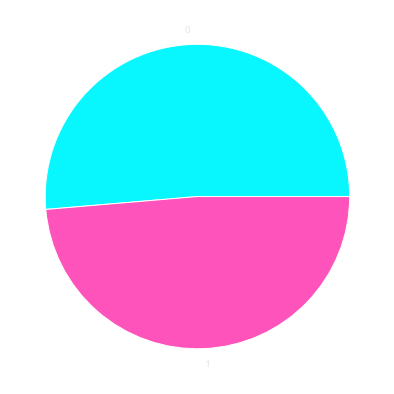

In [5]:
target_count = val_count_df(train_df, "target")
display(target_count)
target_count.set_index("target").plot.pie(y="Value Count", figsize=(10,7), legend=False, ylabel="");

In [6]:
feature_cols = [col for col in train_df.columns if "f_" in col]
dtype_cols = [train_df[i].dtype for i in feature_cols]
dtypes = pd.DataFrame({"features":feature_cols, "dtype":dtype_cols})
float_cols = dtypes.loc[dtypes["dtype"] == "float64", "features"].values.tolist()
int_cols = dtypes.loc[dtypes["dtype"] == "int64", "features"].values.tolist()

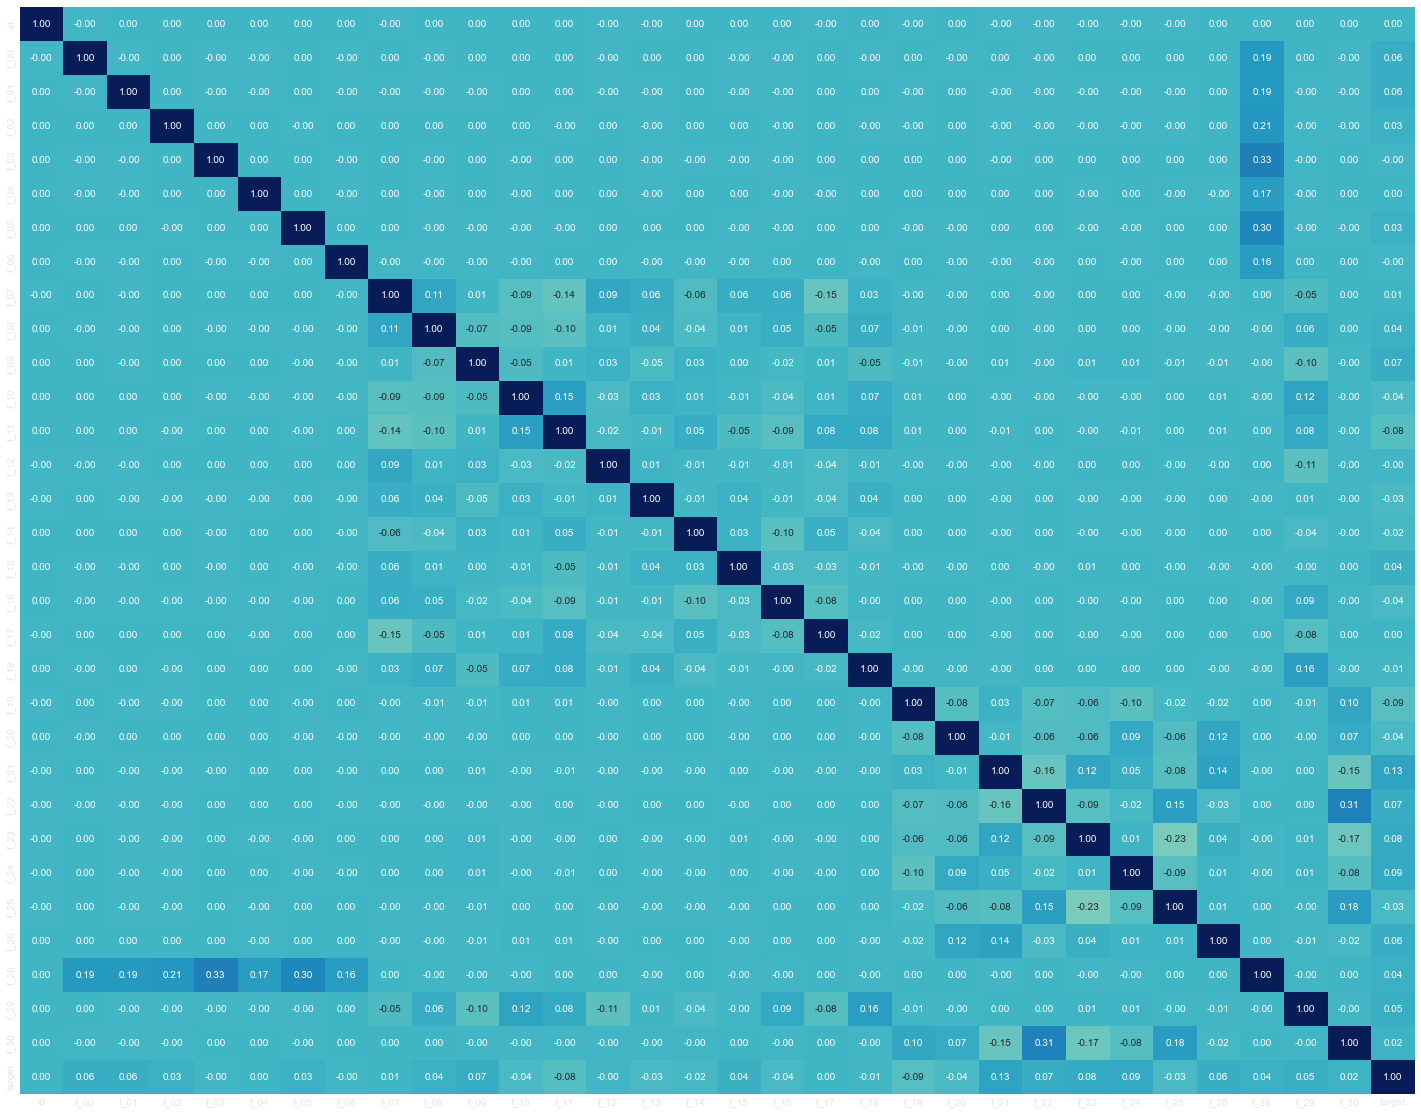

In [7]:
plt.subplots(figsize=(25,20))
sns.heatmap(train_df.corr(),annot=True, cmap="YlGnBu", fmt = '0.2f', vmin=-1, vmax=1, cbar=False);

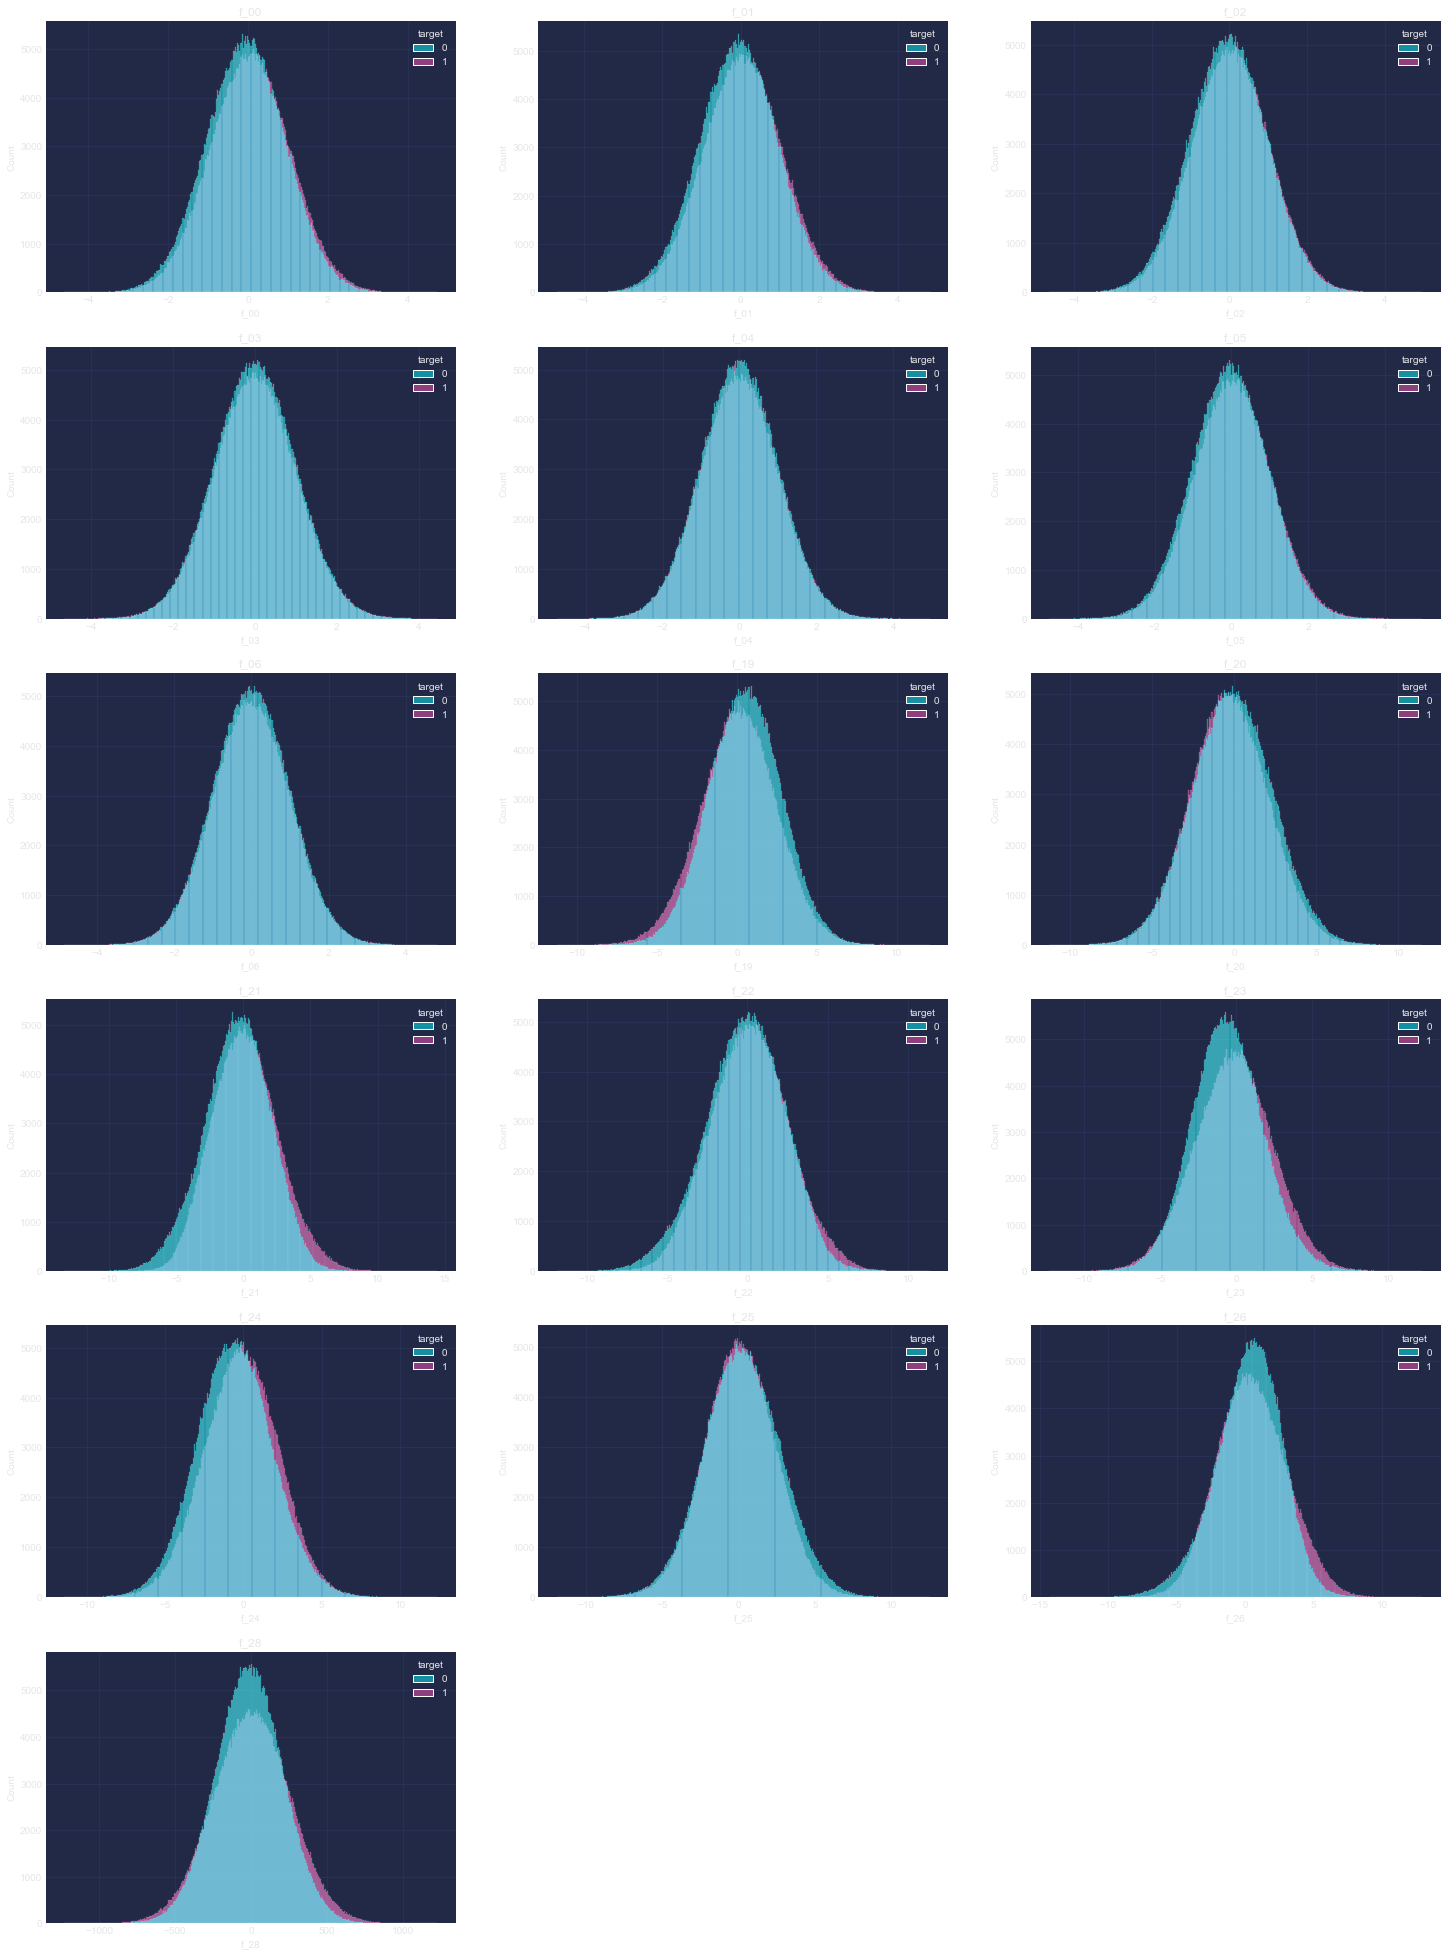

In [8]:
plt.subplots(figsize=(25,35))
for i, column in enumerate(float_cols):
    plt.subplot(6,3,i+1)
    sns.histplot(data=train_df, x=column, hue="target")
    plt.title(column)

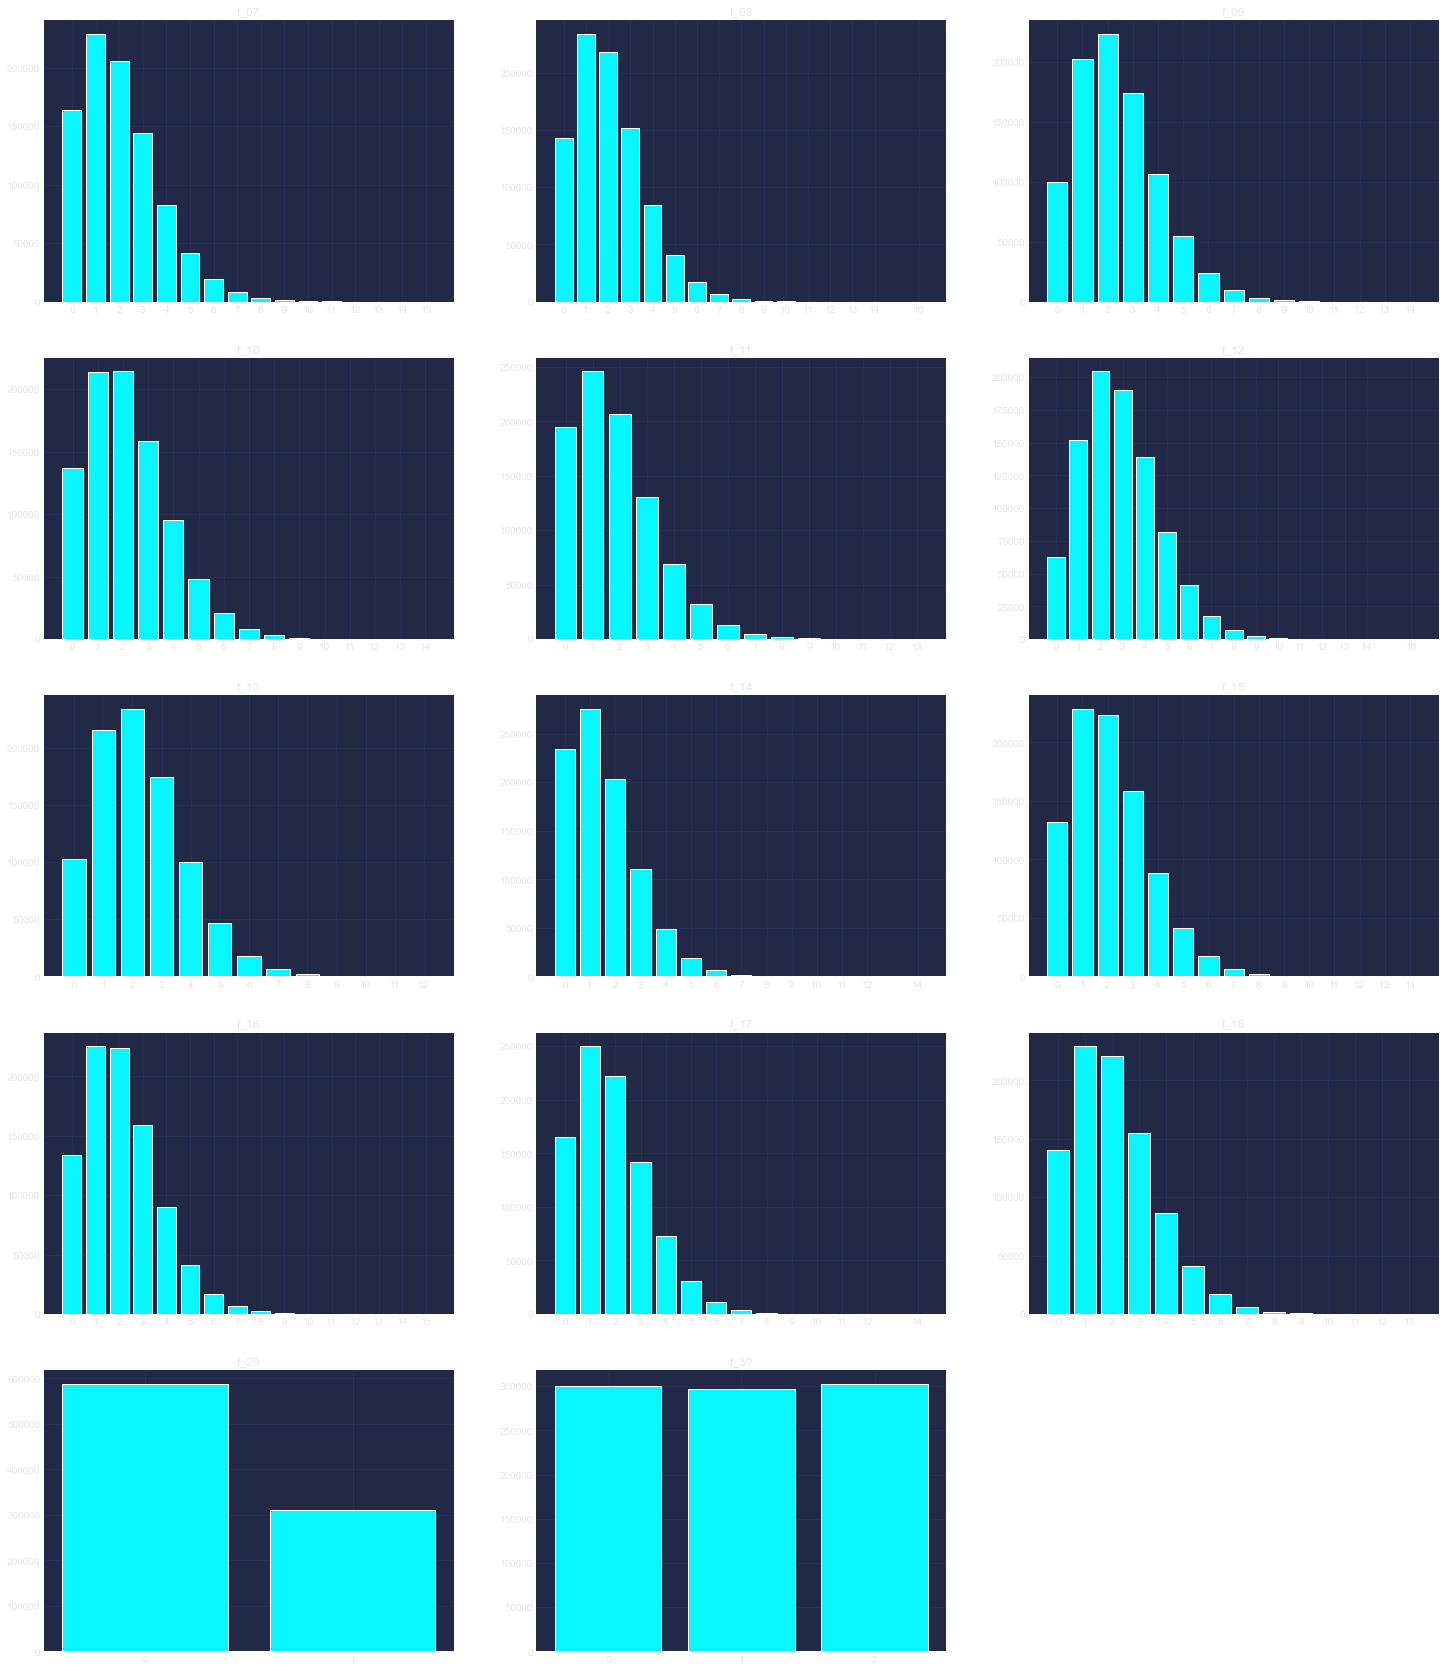

In [9]:
plt.subplots(figsize=(25,30))
for i, column in enumerate(int_cols):
    val_count = train_df[column].value_counts()
    ax = plt.subplot(5,3,i+1)
    #sns.barplot(x=val_count.index,y=val_count.values)
    ax.bar(val_count.index, val_count.values)
    ax.set_xticks(val_count.index)
    plt.title(column)

9000000


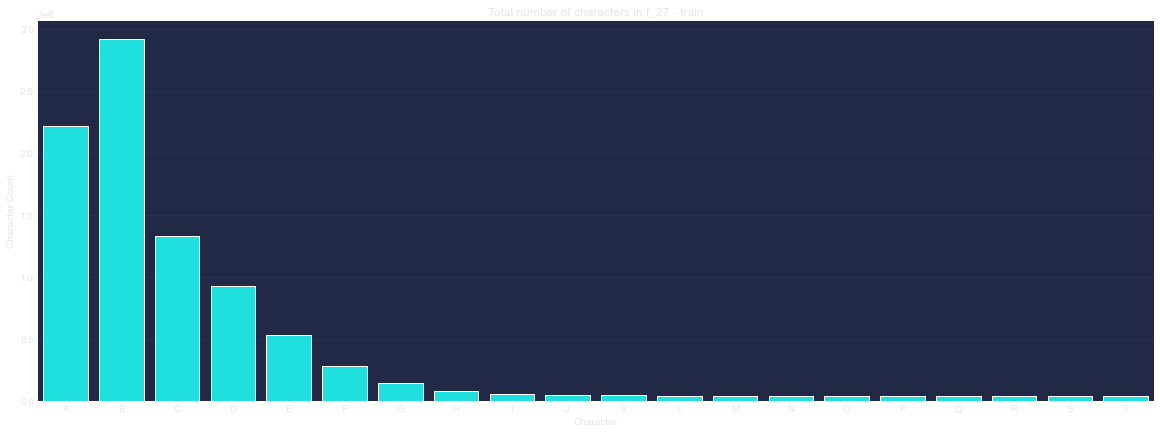

In [10]:
import string
alphabet_upper = list(string.ascii_uppercase)

char_counts = []
for character in alphabet_upper:
    char_counts.append(train_df["f_27"].str.count(character).sum())
char_counts_df = pd.DataFrame({"Character": alphabet_upper, "Character Count": char_counts})
char_counts_df = char_counts_df.loc[char_counts_df["Character Count"] > 0]
print(np.sum(char_counts)) #No other hidden characters

plt.subplots(figsize=(20,7))
sns.barplot(data = char_counts_df, x="Character", y="Character Count", color="cyan");
plt.title("Total number of characters in f_27 - train");

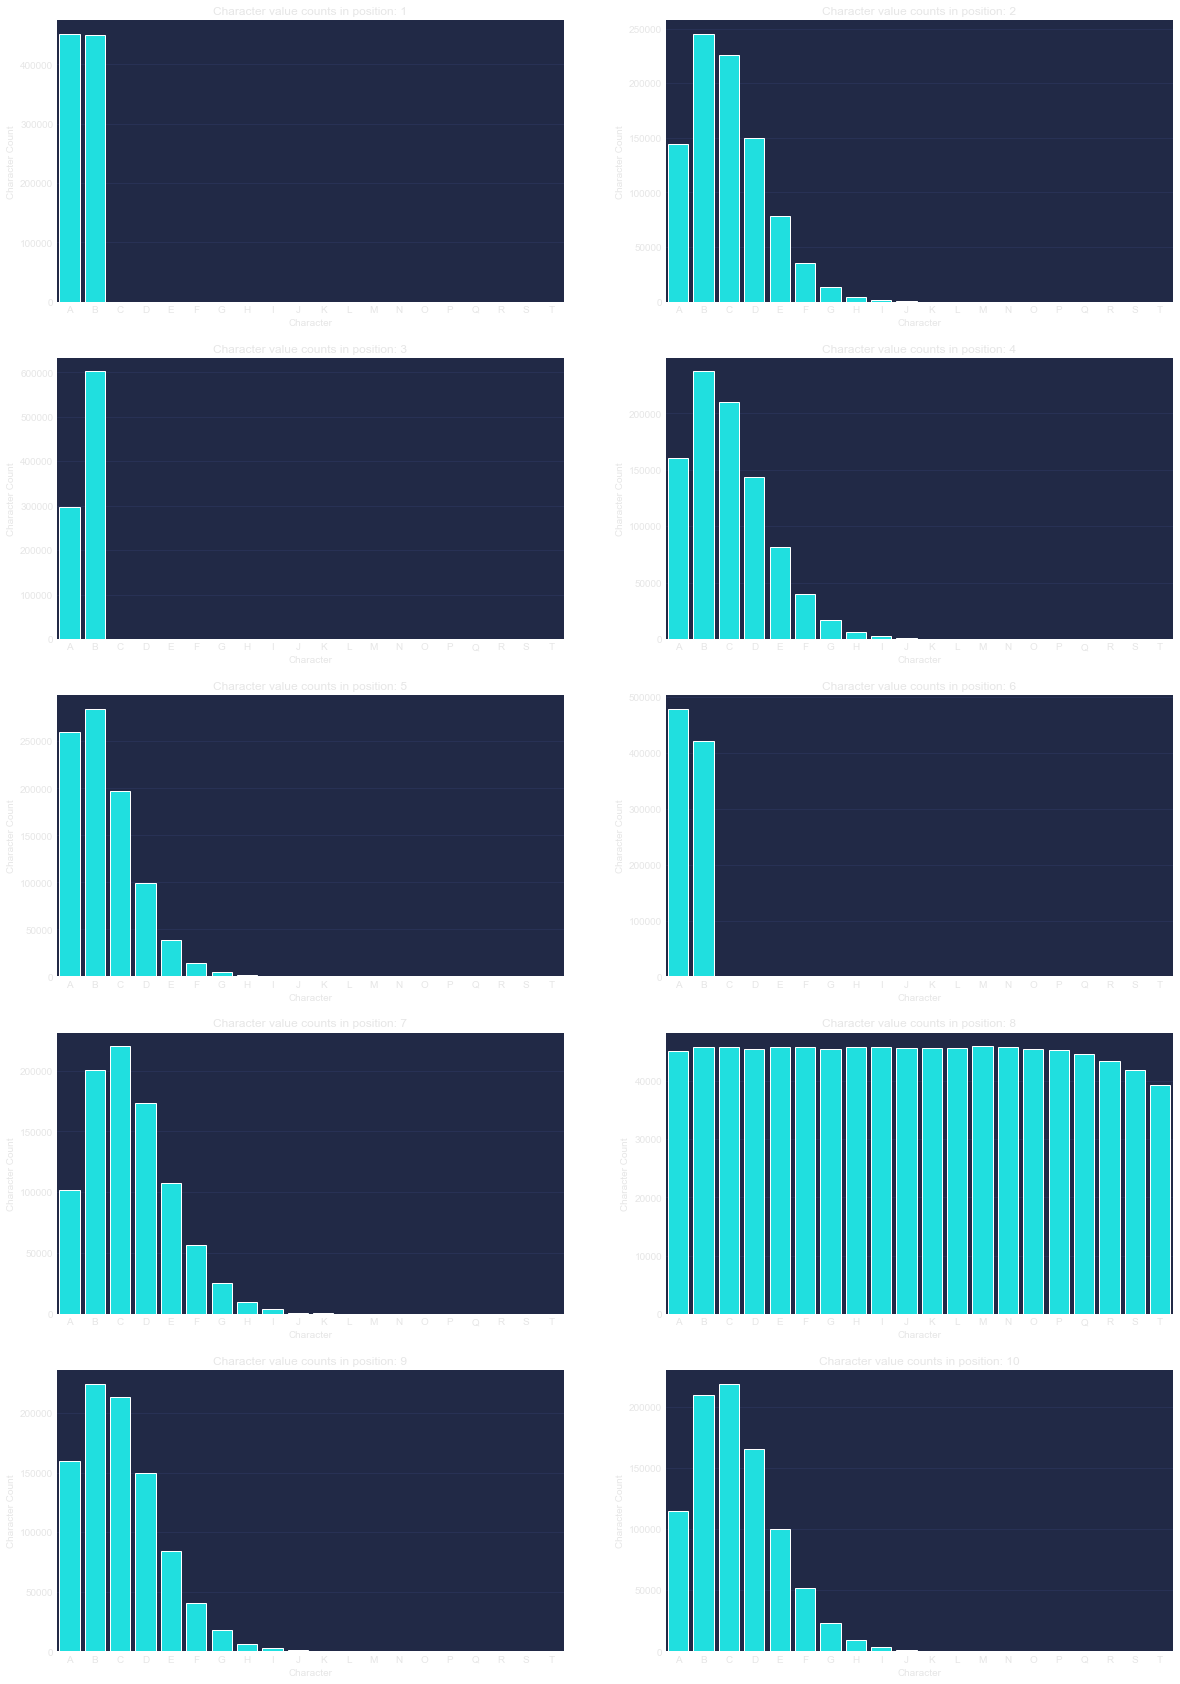

In [11]:
char_counts_df = char_counts_df.set_index("Character", drop=False)
for i in range(10):
    char_counts_df["character"+str(i+1)] = train_df["f_27"].str[i].value_counts()
char_counts_df = char_counts_df.fillna(0)


f,ax = plt.subplots(figsize=(20,30))
character_cols = [i for i in char_counts_df.columns if "character" in i]
for i, column in enumerate(character_cols):
    ax = plt.subplot(5,2,i+1)
    ax = sns.barplot(data = char_counts_df, x="Character", y=column, color="cyan");
    plt.title("Character value counts in position: " +str(i+1));
    ax.set_ylabel("Character Count")

In [12]:
display(train_df["f_27"].head(5)) #f_27 column
display(train_df["f_27"].str[0].head(5)) # character is position 1
display(train_df["f_27"].str[0].apply(lambda x: ord(x) - ord("A")).head(5)) # Encode the characters ordinally

0    ABABDADBAB
1    ACACCADCEB
2    AAAEABCKAD
3    BDBBAACBCB
4    BDBCBBCHFE
Name: f_27, dtype: object

0    A
1    A
2    A
3    B
4    B
Name: f_27, dtype: object

0    0
1    0
2    0
3    1
4    1
Name: f_27, dtype: int64

In [13]:
#number of unique characters
display(train_df["f_27"].head(5)) #f_27 column
train_df["f_27"].apply(lambda x: len(set(x))).head(5) #number of unique characters

0    ABABDADBAB
1    ACACCADCEB
2    AAAEABCKAD
3    BDBBAACBCB
4    BDBCBBCHFE
Name: f_27, dtype: object

0    3
1    5
2    6
3    4
4    6
Name: f_27, dtype: int64

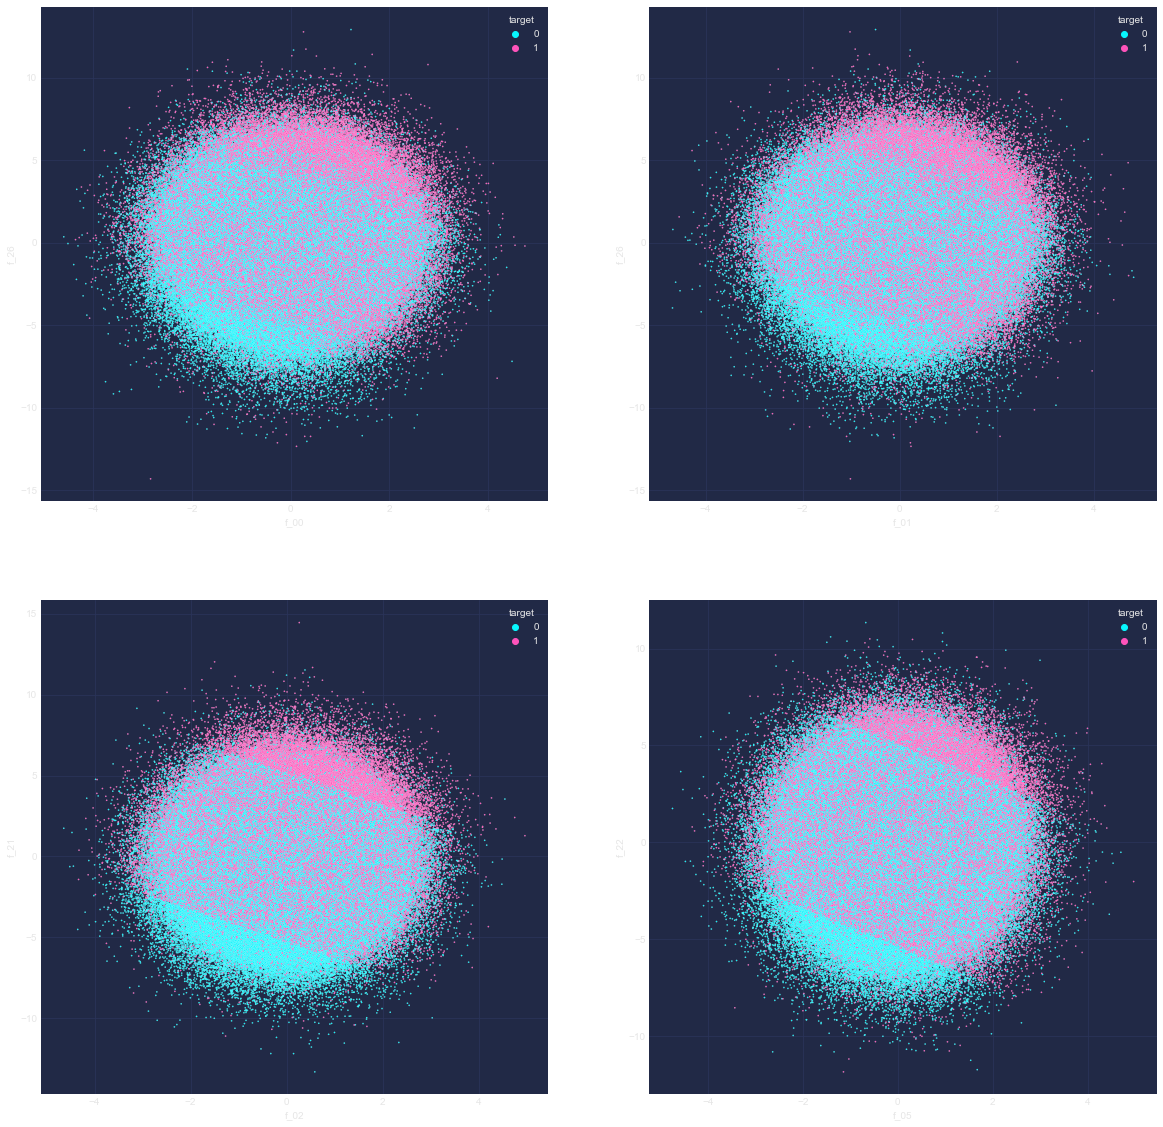

In [14]:
#important interaction features shown by AmbrosM, inspired by wti200
f,ax = plt.subplots(figsize=(20,20))

plt.subplot(2,2,1)
sns.scatterplot(data = train_df, x="f_00", y="f_26", hue="target", s=2);
plt.subplot(2,2,2)
sns.scatterplot(data = train_df, x="f_01", y="f_26", hue="target", s=2);
plt.subplot(2,2,3)
sns.scatterplot(data = train_df, x="f_02", y="f_21", hue="target", s=2);
plt.subplot(2,2,4)
sns.scatterplot(data = train_df, x="f_05", y="f_22", hue="target", s=2);

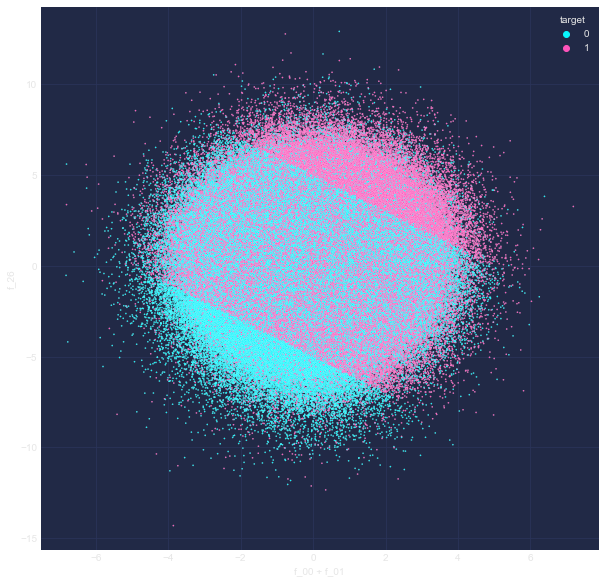

In [15]:
#adding f_00 and f_01 and then plotting against f_26
train_df["f_00 + f_01"] =  train_df["f_00"] + train_df["f_01"]
f,ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data = train_df, x="f_00 + f_01", y="f_26", hue="target", s=2);
#this whos 3 distinct regions

In [16]:
#adding all involved features together and plotting them against a random number drawn from a normal distribution
train_df["f_00 + f_01 + f_26"] = train_df["f_00"] + train_df["f_01"] + train_df["f_26"]
train_df["f_02 + f_21"] = train_df["f_02"] + train_df["f_21"]
train_df["f_05 + f_22"] = train_df["f_05"] + train_df["f_22"]
train_df["random"] = np.random.randn(len(train_df))

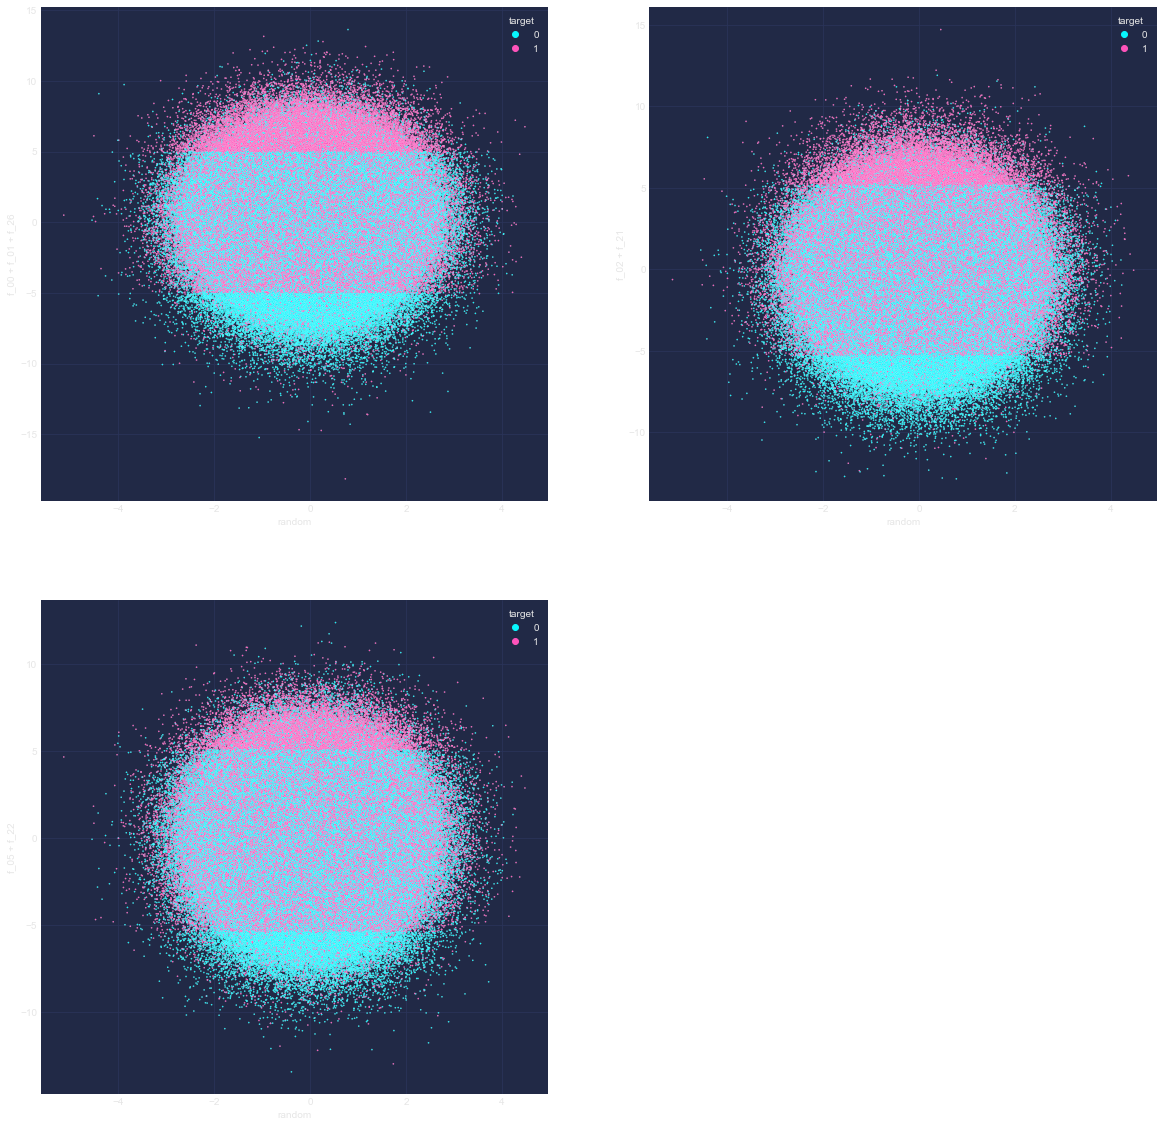

In [17]:
f,ax = plt.subplots(figsize=(20,20))

plt.subplot(2,2,1)
sns.scatterplot(data = train_df, y="f_00 + f_01 + f_26", x="random", hue="target", s=2);
plt.subplot(2,2,2)
sns.scatterplot(data = train_df, y="f_02 + f_21", x="random", hue="target", s=2);
plt.subplot(2,2,3)
sns.scatterplot(data = train_df, y="f_05 + f_22", x="random", hue="target", s=2);

In [18]:
#feature engineering cont.
def feature_engineer(df):
    new_df = df.copy()
    
    # Interaction features from AmbrosM https://www.kaggle.com/code/ambrosm/tpsmay22-advanced-keras/notebook
    # Inspired by wti200 https://www.kaggle.com/code/wti200/analysing-interactions-with-shap
    new_df['i_02_21'] = (df.f_21 + df.f_02 > 5.2).astype(int) - (df.f_21 + df.f_02 < -5.3).astype(int)
    new_df['i_05_22'] = (df.f_22 + df.f_05 > 5.1).astype(int) - (df.f_22 + df.f_05 < -5.4).astype(int)
    
    i_00_01_26 = df.f_00 + df.f_01 + df.f_26
    new_df['i_00_01_26'] = (i_00_01_26 > 5.0).astype(int) - (i_00_01_26 < -5.0).astype(int)
    
    #Good features
    for i in range(10):
        new_df["f_27_"+str(i)] = new_df["f_27"].str[i].apply(lambda x: ord(x) - ord("A"))
    
    #good feature:
    new_df["unique_characters"] = new_df["f_27"].apply(lambda x: len(set(x)))
    
    new_df = new_df.drop(columns=["f_27", "id"])
    return new_df

In [19]:
%%time
train_df.drop(columns = ["f_00 + f_01", "f_00 + f_01 + f_26", "f_02 + f_21", "f_05 + f_22", "random"], inplace=True) # drop the features we made earlier for demonstration
train_df = feature_engineer(train_df)
test_df = feature_engineer(test_df)

CPU times: total: 14.8 s
Wall time: 14.9 s


In [20]:
train_df["unique_characters"].value_counts()

5    399974
6    220715
4    211165
7     33698
3     32164
8      1185
2      1092
9         6
1         1
Name: unique_characters, dtype: int64

In [21]:
#Model cont.

from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [22]:
y = train_df["target"]
X = train_df.drop(columns=["target"])
X_test = test_df
X.head(2)

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_27_1,f_27_2,f_27_3,f_27_4,f_27_5,f_27_6,f_27_7,f_27_8,f_27_9,unique_characters
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,1,0,1,3,0,3,1,0,1,3
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,2,0,2,2,0,3,2,4,1,5


In [23]:
model = LGBMClassifier(n_estimators = 10000, learning_rate = 0.1, random_state=0, min_child_samples=90, num_leaves=150, max_bins=511, n_jobs=-1)

In [24]:
#variation in roc_auc score across folds is very small - so we save time and use 5-fold cross validation but only evaluate 2 of the 5 folds.
def k_fold_cv(model,X,y):
    kfold = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 0)

    feature_imp, y_pred_list, y_true_list, acc_list, roc_list  = [],[],[],[],[]
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
        if fold < 2: # only evaluate 2/5 folds to save time
            print("==fold==", fold)
            X_train = X.loc[train_index]
            X_val = X.loc[val_index]

            y_train = y.loc[train_index]
            y_val = y.loc[val_index]

            model.fit(X_train,y_train)

            y_pred = model.predict_proba(X_val)[:,1]

            y_pred_list = np.append(y_pred_list, y_pred)
            y_true_list = np.append(y_true_list, y_val)

            roc_list.append(roc_auc_score(y_val,y_pred))
            acc_list.append(accuracy_score(y_pred.round(), y_val))
            print("roc auc", roc_auc_score(y_val,y_pred))
            print('Acc', accuracy_score(y_pred.round(), y_val))

            try:
                feature_imp.append(model.feature_importances_)
            except AttributeError: # if model does not have .feature_importances_ attribute
                pass # returns empty list
    return feature_imp, y_pred_list, y_true_list, acc_list, roc_list, X_val, y_val

In [25]:
%%time
feature_imp, y_pred_list, y_true_list, acc_list, roc_list, X_val, y_val = k_fold_cv(model=model,X=X,y=y)

==fold== 0
roc auc 0.9967897320807859
Acc 0.9721722222222222
==fold== 1
roc auc 0.9969687457124248
Acc 0.9725888888888888
CPU times: total: 5h 18min 54s
Wall time: 45min 50s


In [26]:
print("Mean accuracy Score:", np.mean(acc_list))
print("Mean ROC AUC Score:", np.mean(roc_list))

Mean accuracy Score: 0.9723805555555556
Mean ROC AUC Score: 0.9968792388966053


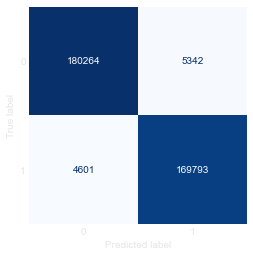

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_cm(preds,true,ax=None):
    cm = confusion_matrix(preds.round(), true)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)#display_labels 
    disp.plot(ax=ax, colorbar=False, cmap='Blues', values_format = '.6g')
    plt.grid(False)
    return disp

plot_cm(y_pred_list, y_true_list);

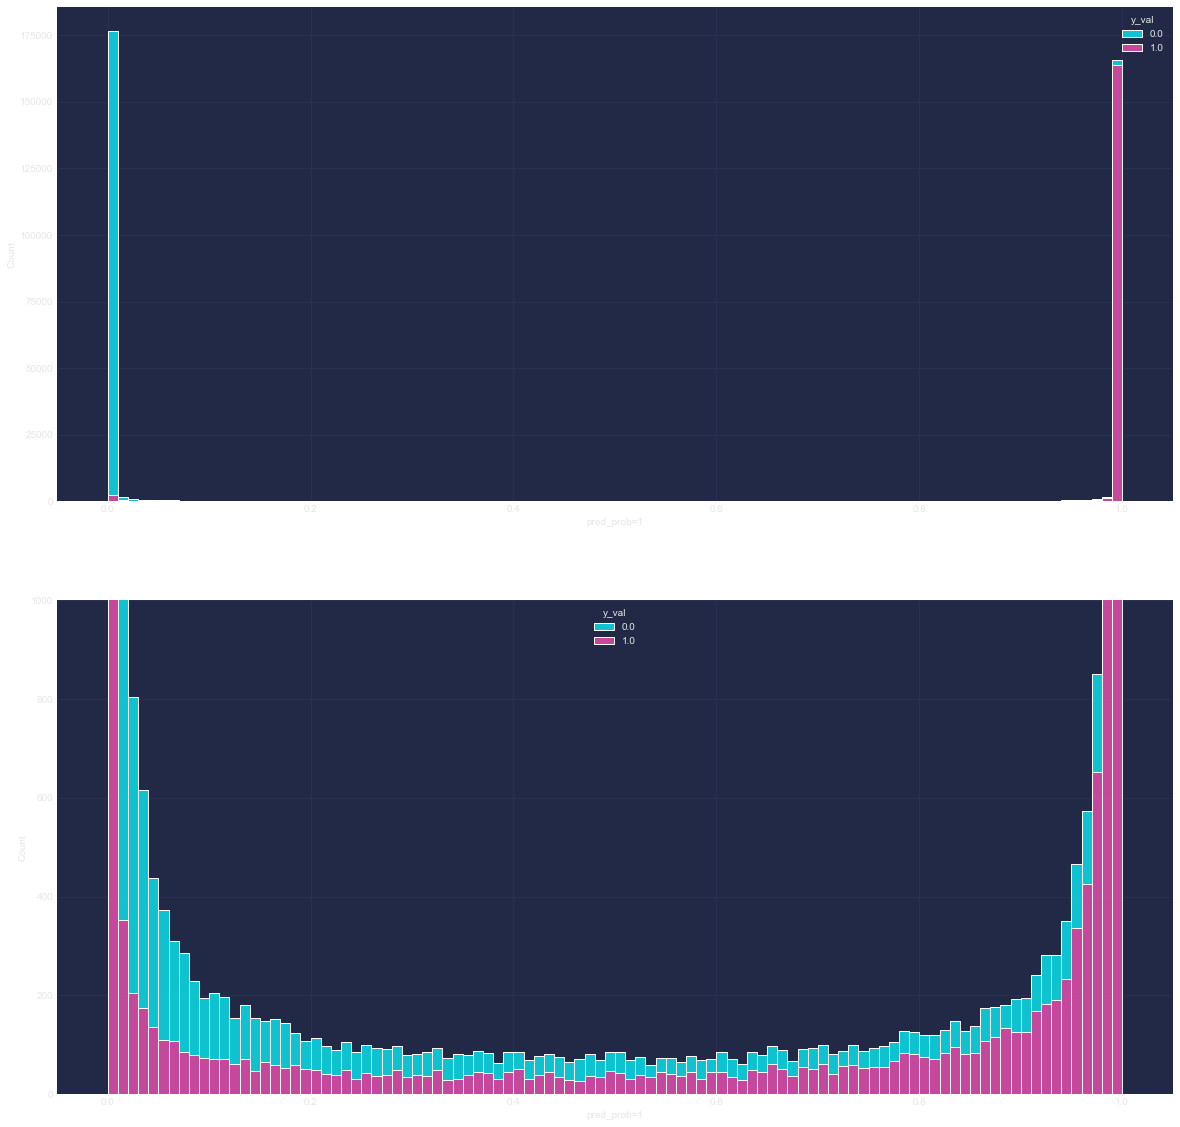

In [46]:
val_preds = pd.DataFrame({"pred_prob=1":y_pred_list, "y_val":y_true_list})
f,ax = plt.subplots(figsize=(20,20))
plt.subplot(2,1,1)
ax = sns.histplot(data=val_preds, x="pred_prob=1", hue="y_val", multiple="stack", bins = 100)
#Same plot "zoomed in"
plt.subplot(2,1,2)
ax = sns.histplot(data=val_preds, x="pred_prob=1", hue="y_val", multiple="stack", bins = 100)
ax.set_ylim([0,1000]);

In [50]:
#feature importance
def fold_feature_importances(model_importances, column_names, model_name, n_folds = 5, ax=None, boxplot=False):
    importances_df = pd.DataFrame({"feature_cols": column_names, "importances_fold_0": model_importances[0]})
    for i in range(1,n_folds):
        importances_df["importances_fold_"+str(i)] = model_importances[i]
    importances_df["importances_fold_median"] = importances_df.drop(columns=["feature_cols"]).median(axis=1)
    importances_df = importances_df.sort_values(by="importances_fold_median", ascending=False)
    if ax == None:
        f, ax = plt.subplots(figsize=(15, 25))
    if boxplot == False:
        ax = sns.barplot(data = importances_df, x = "importances_fold_median", y="feature_cols", color="cyan")
        ax.set_xlabel("Median Feature importance across all folds");
    elif boxplot == True:
        importances_df = importances_df.drop(columns="importances_fold_median")
        importances_df = importances_df.set_index("feature_cols").stack().reset_index().rename(columns={0:"feature_importance"})
        ax = sns.boxplot(data = importances_df, y = "feature_cols", x="feature_importance", color="cyan", orient="h")
        ax.set_xlabel("Feature importance across all folds");
    plt.title(model_name)
    ax.set_ylabel("Feature Columns")
    return ax

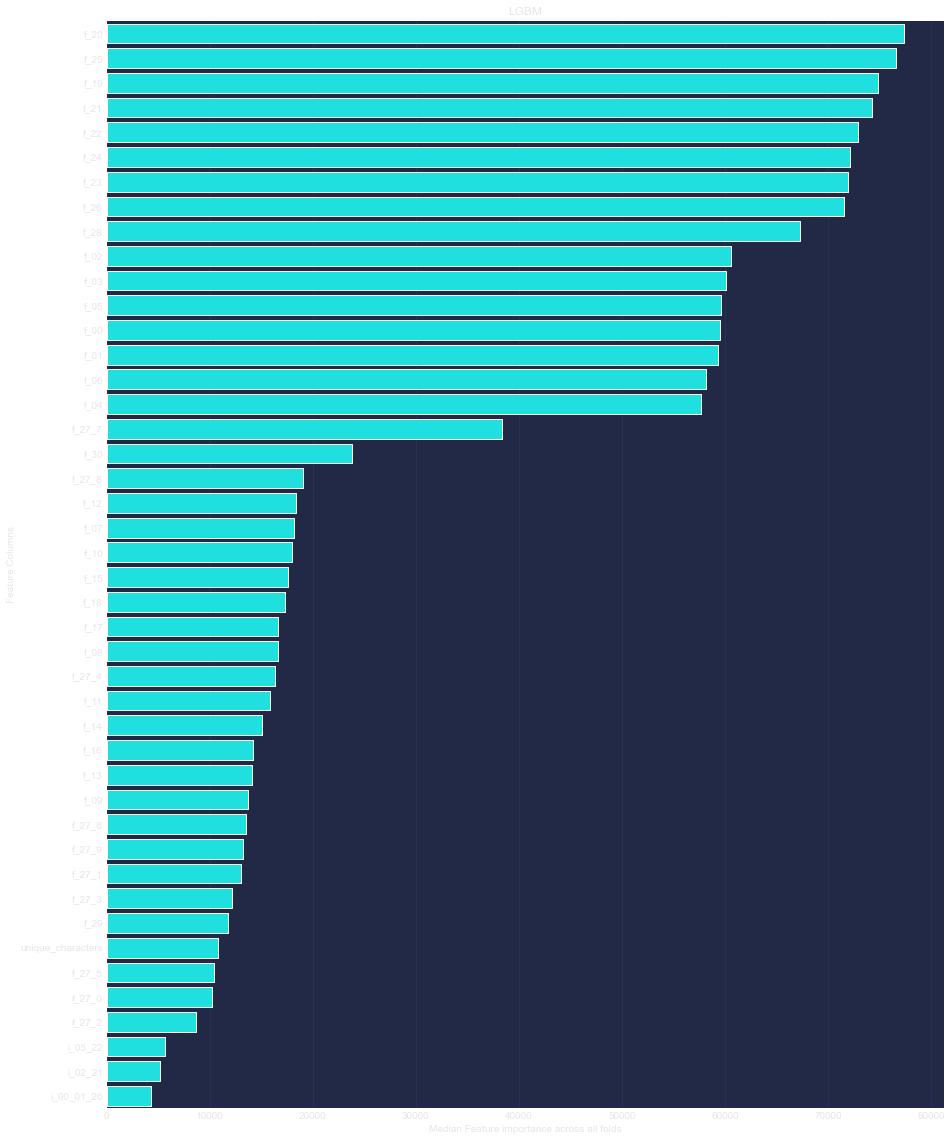

In [51]:
f, ax = plt.subplots(figsize=(15, 20))
fold_feature_importances(model_importances = feature_imp, column_names = X_val.columns, model_name = "LGBM", n_folds = 2, ax=ax, boxplot=False);

In [52]:
def pred_test():
    pred_list = []
    for seed in range(5):
        model = LGBMClassifier(n_estimators = 10000, learning_rate = 0.1, min_child_samples=90, num_leaves=150, max_bins=511, random_state=seed, n_jobs=-1)
        model.fit(X,y)

        preds = model.predict_proba(X_test)[:,1]
        pred_list.append(preds)
    return pred_list

In [53]:
pred_list = pred_test()
pred_df = pd.DataFrame(pred_list).T
pred_df = pred_df.rank()
pred_df["mean"] = pred_df.mean(axis=1)
pred_df

,0,1,2,3,4,mean
0,591573.5,580578.5,599195.0,588590.5,597814.0,591550.3
1,578858.5,585129.5,594988.0,572866.5,565629.5,579494.4
2,13823.0,15851.0,12344.0,13103.0,15234.0,14071.0
3,134509.0,109434.0,102639.0,142159.0,105496.0,118847.4
4,563872.0,553940.5,565504.0,565360.5,571697.0,564074.8
...,...,...,...,...,...,...
699995,375332.0,363931.0,368807.0,371601.0,359993.0,367932.8
699996,562784.0,572969.0,578302.0,593610.5,560824.5,573698.0
699997,305994.0,307227.0,279222.0,294543.0,294641.0,296325.4
699998,172843.0,171594.0,137176.0,153016.0,141771.0,155280.0


In [54]:
sample_sub = pd.read_csv("sample_submission.csv")
sample_sub["target"] = pred_df["mean"]
sample_sub

,id,target
0,900000,591550.3
1,900001,579494.4
2,900002,14071.0
3,900003,118847.4
4,900004,564074.8
...,...,...
699995,1599995,367932.8
699996,1599996,573698.0
699997,1599997,296325.4
699998,1599998,155280.0
